# Use RSI and Python To Determine if Bitcoin is Over Sold

Based on [Use RSI and Python To Determine if Bitcoin is Over Sold](https://www.youtube.com/watch?v=RwP1KzRahGw) from [Computer Science](https://www.youtube.com/channel/UCbmb5IoBtHZTpYZCDBOC1CA)

**Disclaimer:** _Investing in the stock market involves risk and can lead to monetary loss. This material is purely for educational purposes and should not be taken as professional investment advice. Invest at your own discretion._

Import dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.style.use('fivethirtyeight')

Load the data

In [3]:
df = pd.read_csv('BTC.csv')

Show the data

In [4]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-12-08,7551.338867,7634.606445,7476.091309,7564.345215,15409908086,0,0
1,2019-12-09,7561.795410,7618.091797,7365.985352,7400.899414,17872021272,0,0
2,2019-12-10,7397.134277,7424.022949,7246.043945,7278.119629,18249031195,0,0
3,2019-12-11,7277.197754,7324.156250,7195.527344,7217.427246,16350490689,0,0
4,2019-12-12,7216.738770,7266.639648,7164.741211,7243.134277,18927080224,0,0
...,...,...,...,...,...,...,...,...
522,2021-05-17,46415.898438,46623.558594,42207.289062,43537.511719,74903638450,0,0
523,2021-05-18,43488.058594,45812.457031,42367.832031,42909.402344,56187365084,0,0
524,2021-05-19,42944.976562,43546.117188,30681.496094,37002.441406,126358098747,0,0
525,2021-05-20,36753.667969,42462.984375,35050.617188,40782.738281,88281943359,0,0


Set the date as index

In [5]:
df = df.set_index(pd.DatetimeIndex(df['Date'].values))

Show the data

In [6]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
2019-12-08,2019-12-08,7551.338867,7634.606445,7476.091309,7564.345215,15409908086,0,0
2019-12-09,2019-12-09,7561.795410,7618.091797,7365.985352,7400.899414,17872021272,0,0
2019-12-10,2019-12-10,7397.134277,7424.022949,7246.043945,7278.119629,18249031195,0,0
2019-12-11,2019-12-11,7277.197754,7324.156250,7195.527344,7217.427246,16350490689,0,0
2019-12-12,2019-12-12,7216.738770,7266.639648,7164.741211,7243.134277,18927080224,0,0
...,...,...,...,...,...,...,...,...
2021-05-17,2021-05-17,46415.898438,46623.558594,42207.289062,43537.511719,74903638450,0,0
2021-05-18,2021-05-18,43488.058594,45812.457031,42367.832031,42909.402344,56187365084,0,0
2021-05-19,2021-05-19,42944.976562,43546.117188,30681.496094,37002.441406,126358098747,0,0
2021-05-20,2021-05-20,36753.667969,42462.984375,35050.617188,40782.738281,88281943359,0,0


Create and plot the graph

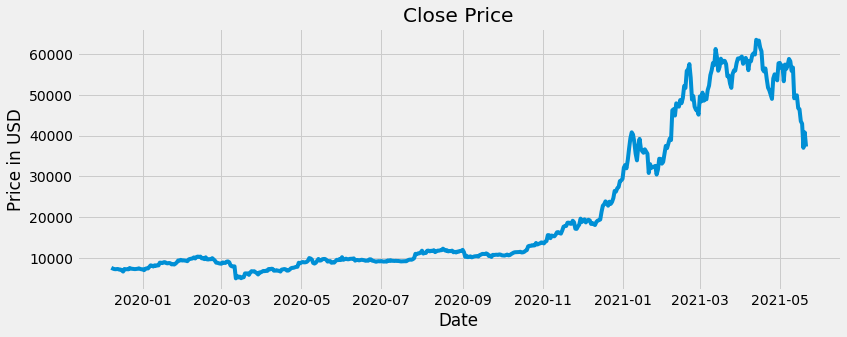

In [7]:
plt.figure(figsize=(12.2, 4.5))
plt.plot(df.index, df['Close'], label='Close')
plt.title('Close Price')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.show()

Calculate the RSI (Relative Strength Index)

In [8]:
delta = df['Close'].diff(1)
delta = delta.dropna()
up = delta.copy()
down = delta.copy()
up[up<0] = 0 
down[down>0] = 0
time_period = 14
AVG_Gain = up.rolling(window=time_period).mean()
AVG_Loss = abs(down.rolling(window=time_period).mean())
RS = AVG_Gain / AVG_Loss
RSI = 100.0 - (100.0 / (1.0 + RS))

Plot the RSI

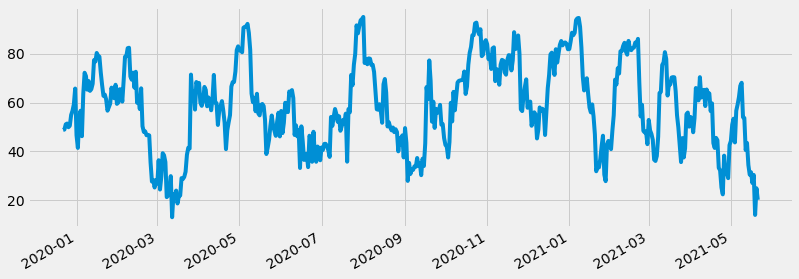

In [9]:
plt.figure(figsize=(12.2, 4.5))
RSI.plot()
plt.show()

Plot the RSI with overbought and oversold lines/levels

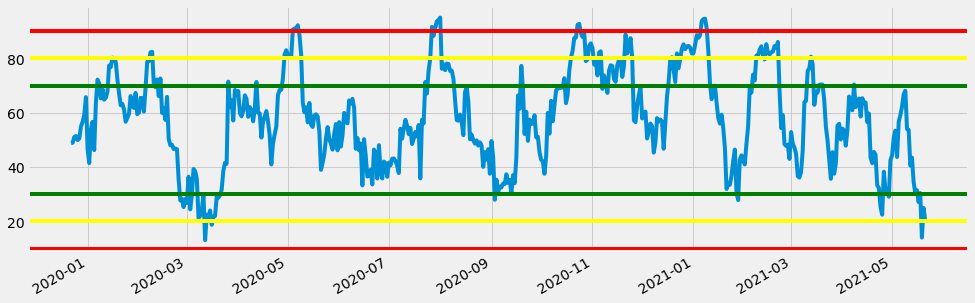

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))
ax0 = RSI.plot(ax=ax)
ax0.axhline(30, color='green')
ax0.axhline(70, color='green')
ax0.axhline(20, color='yellow')
ax0.axhline(80, color='yellow')
ax0.axhline(10, color='red')
ax0.axhline(90, color='red')

Oversold

**THIS IS NOT AN INVESTMENT ADVICE!**